### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('sample_data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.tail(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12665,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12672,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# Several variables here are object(categorical), and some are (int64) numerical
# Variables that seem to have potential missing data include 'Bar', 'CofeeHouse', 'RestaurantLessThan20', 'Restaurant20To50'
# Most of the other variable seems to have 12684 entries

In [7]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
missing_data = data.isna().sum()
print(missing_data)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'destination'),
  Text(1, 0, 'passanger'),
  Text(2, 0, 'weather'),
  Text(3, 0, 'temperature'),
  Text(4, 0, 'time'),
  Text(5, 0, 'coupon'),
  Text(6, 0, 'expiration'),
  Text(7, 0, 'gender'),
  Text(8, 0, 'age'),
  Text(9, 0, 'maritalStatus'),
  Text(10, 0, 'has_children'),
  Text(11, 0, 'education'),
  Text(12, 0, 'occupation'),
  Text(13, 0, 'income'),
  Text(14, 0, 'car'),
  Text(15, 0, 'Bar'),
  Text(16, 0, 'CoffeeHouse'),
  Text(17, 0, 'CarryAway'),
  Text(18, 0, 'RestaurantLessThan20'),
  Text(19, 0, 'Restaurant20To50'),
  Text(20, 0, 'toCoupon_GEQ5min'),
  Text(21, 0, 'toCoupon_GEQ15min'),
  Text(22, 0, 'toCoupon_GEQ25min'),
  Text(23, 0, 'direction_same'),
  Text(24, 0, 'direction_opp'),
  Text(25, 0, 'Y')])

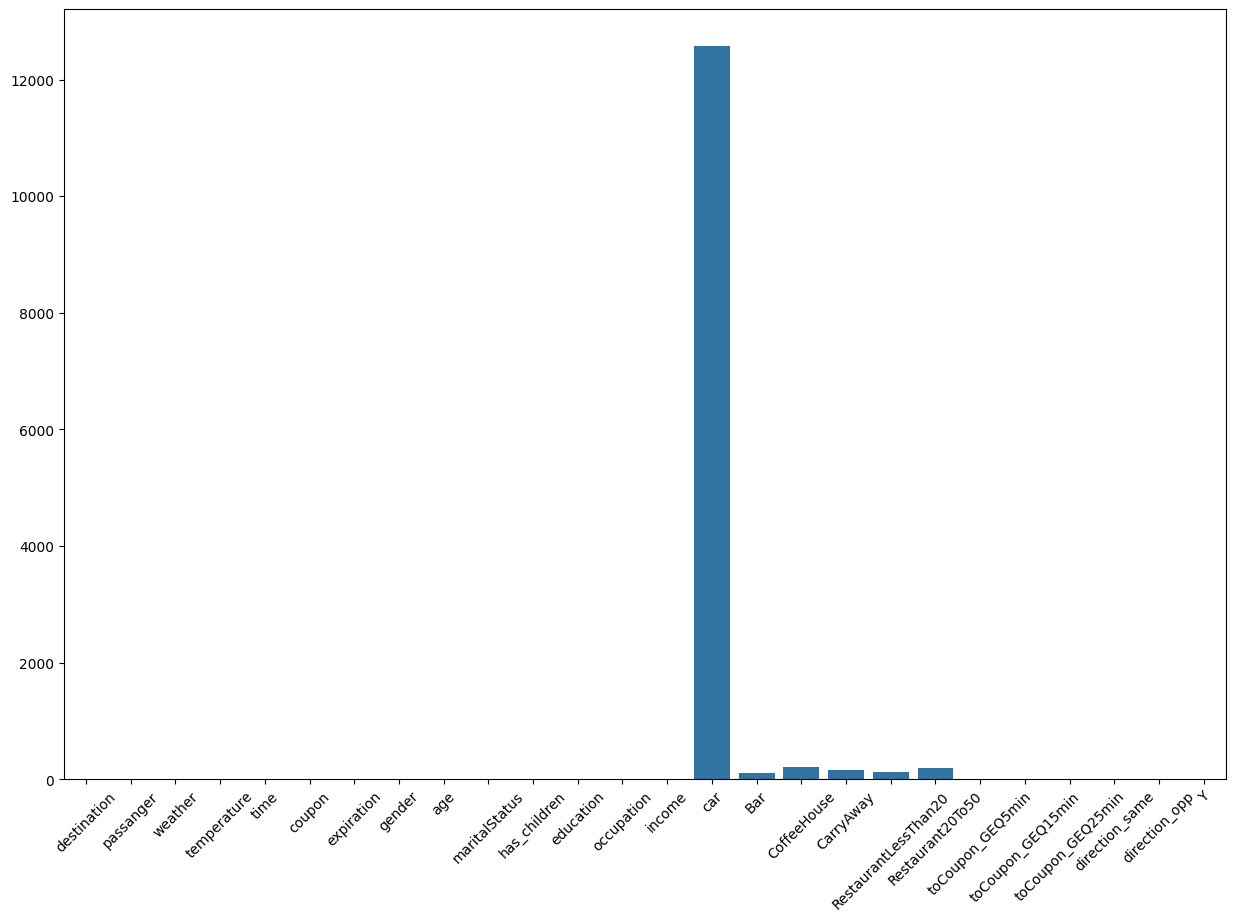

In [9]:

plt.figure(figsize=(15,10))
sns.barplot(data=missing_data)
plt.xticks(rotation=45)

In [10]:
Total_missing_data = missing_data.sum()
print(Total_missing_data)
car_missing = ((data['car'].isnull().sum()/Total_missing_data) * 100)
print(f"{car_missing:.2f}")
# 94% of all missing values are related to the 'car' columnrestaurantlessthan20_missing = ((data['RestaurantLessThan20'].isnull().sum()/Total_missing_data) * 100)

CoffeeHouse_missing = ((data['CoffeeHouse'].isnull().sum()/Total_missing_data) * 100)
print(f"{CoffeeHouse_missing:.2f}")

restaurantlessthan20_missing = ((data['RestaurantLessThan20'].isnull().sum()/Total_missing_data) * 100)
print(f"{restaurantlessthan20_missing:.2f}")
# About 1% of all missing values are related to the 'RestaurantLessThan20'

bar_missing = ((data['Bar'].isnull().sum()/Total_missing_data) *100)
print(f"{bar_missing:.2f}")
#.8 of all missing data is related to the bar

carryaway_missing = ((data['CarryAway'].isnull().sum()/Total_missing_data) *100)
print(f"{carryaway_missing:.2f}")
#.8 of all missing data is related to the bar

restaurant20to50_missing = ((data['Restaurant20To50'].isnull().sum()/Total_missing_data) *100)
print(f"{restaurant20to50_missing:.2f}")
#.8 of all missing data is related to the bar



13370
94.06
1.62
0.97
0.80
1.13
1.41


In [11]:
missing_data2 = data.isnull().sum()
print (missing_data2)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'destination'),
  Text(1, 0, 'passanger'),
  Text(2, 0, 'weather'),
  Text(3, 0, 'temperature'),
  Text(4, 0, 'time'),
  Text(5, 0, 'coupon'),
  Text(6, 0, 'expiration'),
  Text(7, 0, 'gender'),
  Text(8, 0, 'age'),
  Text(9, 0, 'maritalStatus'),
  Text(10, 0, 'has_children'),
  Text(11, 0, 'education'),
  Text(12, 0, 'occupation'),
  Text(13, 0, 'income'),
  Text(14, 0, 'car'),
  Text(15, 0, 'Bar'),
  Text(16, 0, 'CoffeeHouse'),
  Text(17, 0, 'CarryAway'),
  Text(18, 0, 'RestaurantLessThan20'),
  Text(19, 0, 'Restaurant20To50'),
  Text(20, 0, 'toCoupon_GEQ5min'),
  Text(21, 0, 'toCoupon_GEQ15min'),
  Text(22, 0, 'toCoupon_GEQ25min'),
  Text(23, 0, 'direction_same'),
  Text(24, 0, 'direction_opp'),
  Text(25, 0, 'Y')])

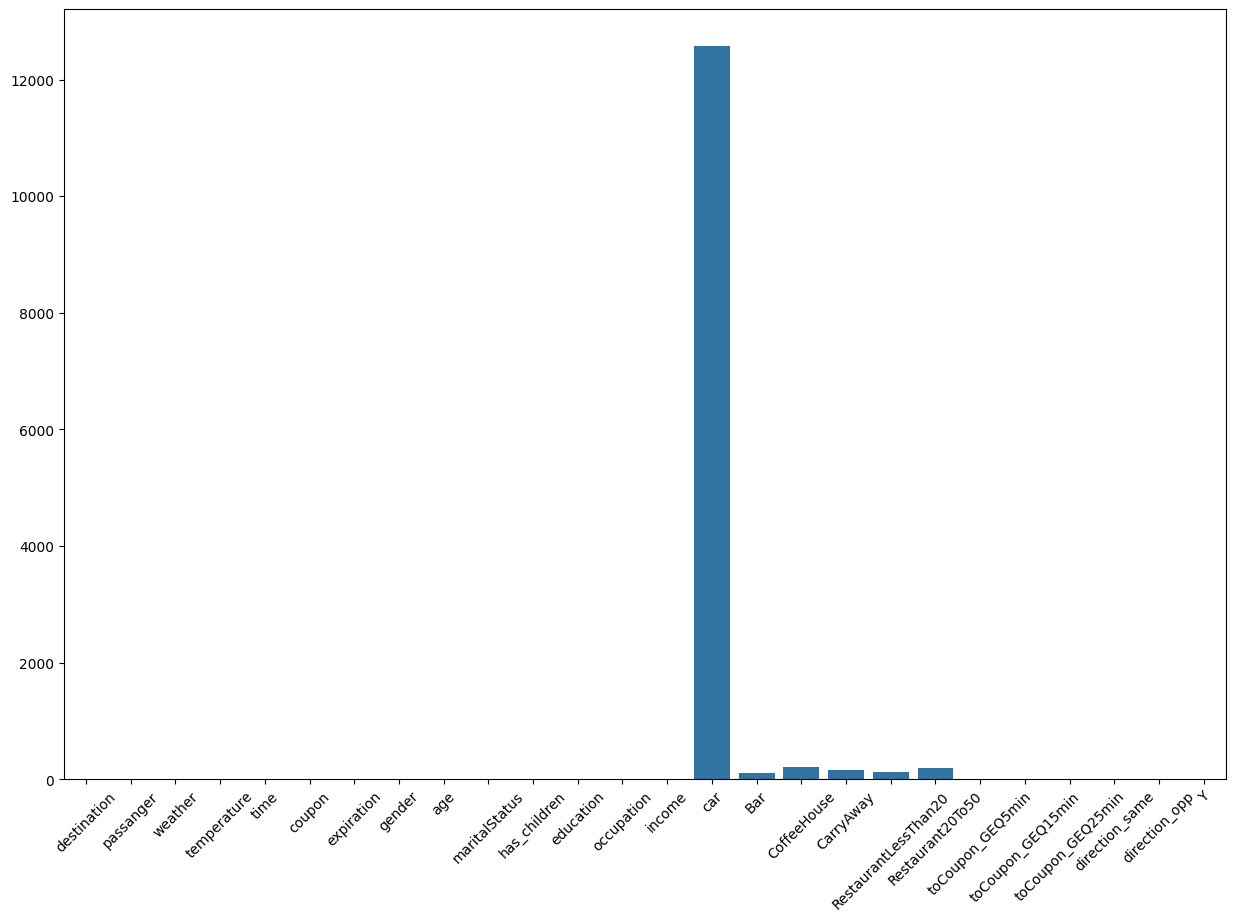

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(data=missing_data2)
plt.xticks(rotation=45)

In [13]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [14]:
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [15]:
data['Bar'].fillna("never", inplace=True)

In [16]:
data['Bar'].value_counts()

Bar
never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [17]:
data['CoffeeHouse'].value_counts()
data['CoffeeHouse'].fillna("less1", inplace=True)
#Fill the null or Nan with the most reoccuring value

In [18]:
data['CoffeeHouse'].value_counts()


CoffeeHouse
less1    3602
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [19]:
data['CarryAway'].value_counts()
data['CarryAway'].fillna("1~3", inplace=True)
data['CarryAway'].value_counts()
#Fill the null or Nan with the most reoccuring value

CarryAway
1~3      4823
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [20]:
data['RestaurantLessThan20'].value_counts()
data['RestaurantLessThan20'].fillna("1~3", inplace=True)
data['RestaurantLessThan20'].value_counts()
#Fill the null or Nan with the most reoccuring value

RestaurantLessThan20
1~3      5506
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [21]:
data['Restaurant20To50'].value_counts()
data['Restaurant20To50'].fillna("less1", inplace=True)
data['Restaurant20To50'].value_counts()
#Fill the null or Nan with the most reoccuring value

Restaurant20To50
less1    6266
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [22]:
data.drop('car', axis=1, inplace=True)

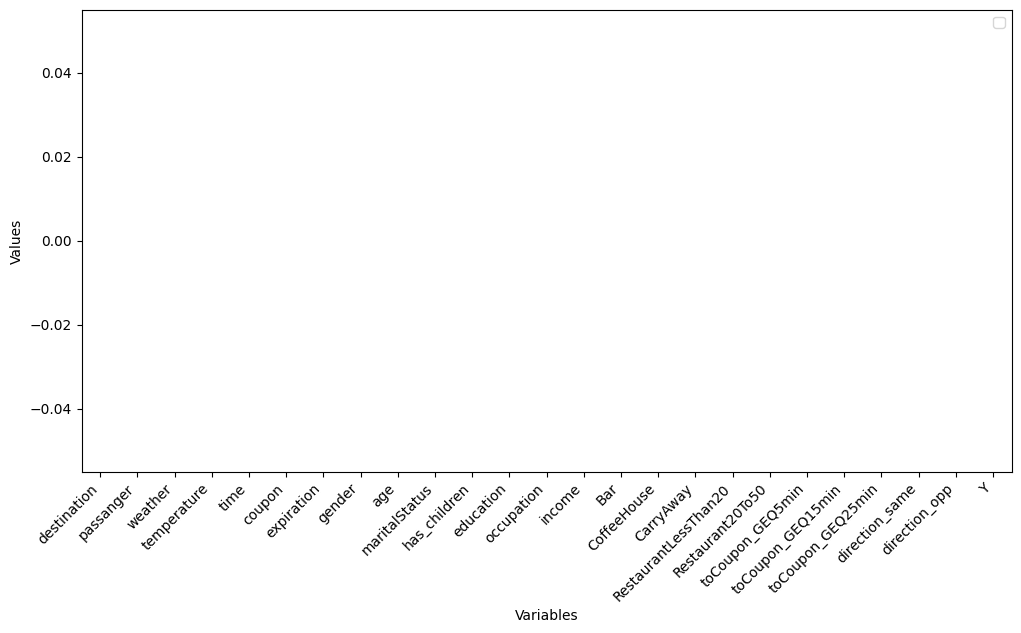

In [23]:
after_fill_na = data.isnull().sum()
after_fill_na.plot(kind='bar', figsize=(12,6))
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.show()
#Show a graph of null or missing values in the dataframe

In [24]:
corr = pd.DataFrame(data)
cd = corr['destination'].value_counts()
ps = corr['passanger'].value_counts()
w = corr['weather'].value_counts()
t = corr['time'].value_counts()
c = corr['coupon'].value_counts()
dest_mapping = {'No Urgent Place': 1, 'Home':2, 'Work':3}
passanger_mapping = {'Alone':1, 'Friend(s)':2, 'Partner':3, 'Kid(s)':4}
weather_mapping = {'Sunny':1, 'Snowy':2, 'Rainy':3}
time_mapping = {'6PM':1, '7AM':2, '10AM':3, '2PM':4, '10PM':5}
coupon_mapping = {'Coffee House':1, 'Restaurant(<20)':2, 'Carry out & Take away':3, 'Bar':4, 'Restaurant(20-50)':5}
corr['destination'] = corr['destination'].replace(dest_mapping)
corr['passanger'] = corr['passanger'].replace(passanger_mapping)
corr['weather'] = corr['weather'].replace(weather_mapping)
corr['time'] = corr['time'].replace(time_mapping)
corr['coupon'] = corr['coupon'].replace(coupon_mapping)

#corr_matrix = corr.corr()



In [25]:
count_y  = data['Y'].value_counts()
sum = data['Y'].value_counts().sum()

count_y_ratio = (((data['Y']==1).sum()/sum) * 100)
count_n_ratio = (((data['Y']==0).sum()/sum)* 100)
print("Accepted coupon:", f"{count_y_ratio:.2f}%")
print("Non-acceptance of coupon", f"{count_n_ratio:.2f}%")


Accepted coupon: 56.84%
Non-acceptance of coupon 43.16%


4. What proportion of the total observations chose to accept the coupon?



In [26]:
#56.84% of all observations chose to accept the coupon; 43.16% of all observations chose to abandon or reject the coupon

In [27]:
coupon_breakdown = data.groupby('coupon')['Y'].value_counts().reset_index()
print(coupon_breakdown)


                  coupon  Y  count
0                    Bar  0   1190
1                    Bar  1    827
2  Carry out & Take away  1   1760
3  Carry out & Take away  0    633
4           Coffee House  0   2001
5           Coffee House  1   1995
6      Restaurant(20-50)  0    834
7      Restaurant(20-50)  1    658
8        Restaurant(<20)  1   1970
9        Restaurant(<20)  0    816


5. Use a bar plot to visualize the `coupon` column.

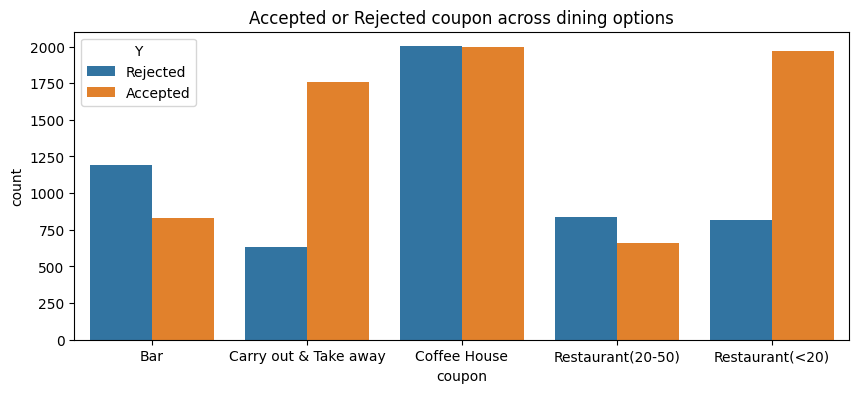

In [28]:
plt.figure(figsize=(10,4))
plt.title('Accepted or Rejected coupon across dining options')
coupon_segment_chart = sns.barplot(data=coupon_breakdown, x='coupon', y='count', hue='Y')
sns.move_legend(coupon_segment_chart, 'best', labels=["Rejected", "Accepted"])
plt.show()


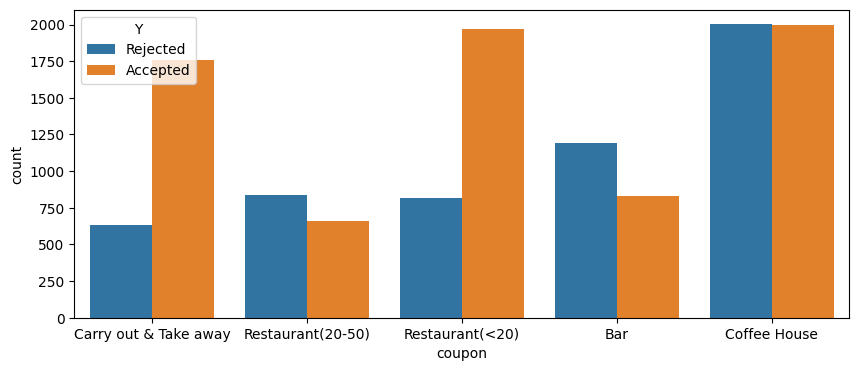

In [29]:
plt.figure(figsize=(10,4))
sort_coupon_breakdown_chart = sns.barplot(data=coupon_breakdown, x="coupon",y="count", hue="Y", order=coupon_breakdown.sort_values('count', ascending=True).coupon)
sns.move_legend(sort_coupon_breakdown_chart, 'best', labels=["Rejected", "Accepted"])
plt.show()

For Bar, There is a higher number of coupons being rejected then being accepted. For Carry out & Take away, there is a higher number of coupons being accepted.For Coffee house coupons, there is an rough parity of coupons being accepted and rejected. For 20-50 restaurants, more coupons being rejected. For less than 20, higher number coupons are being accepted.

                   coupon      age  count
0       Restaurant(20-50)  below21     63
1       Restaurant(20-50)       46     84
2                     Bar  below21     87
3                     Bar       46    109
4   Carry out & Take away  below21    114
5   Carry out & Take away       46    125
6         Restaurant(<20)  below21    128
7       Restaurant(20-50)       41    134
8         Restaurant(<20)       46    148
9            Coffee House  below21    155
10      Restaurant(20-50)       36    166
11                    Bar       41    178
12  Carry out & Take away       41    209
13                    Bar       36    209
14           Coffee House       46    220
15      Restaurant(20-50)   50plus    222
16      Restaurant(20-50)       31    235
17        Restaurant(<20)       41    247
18  Carry out & Take away       36    249
19                    Bar   50plus    283
20      Restaurant(20-50)       26    290
21        Restaurant(<20)       36    293
22      Restaurant(20-50)       21

Text(0.5, 1.0, 'Age vs Dining Options')

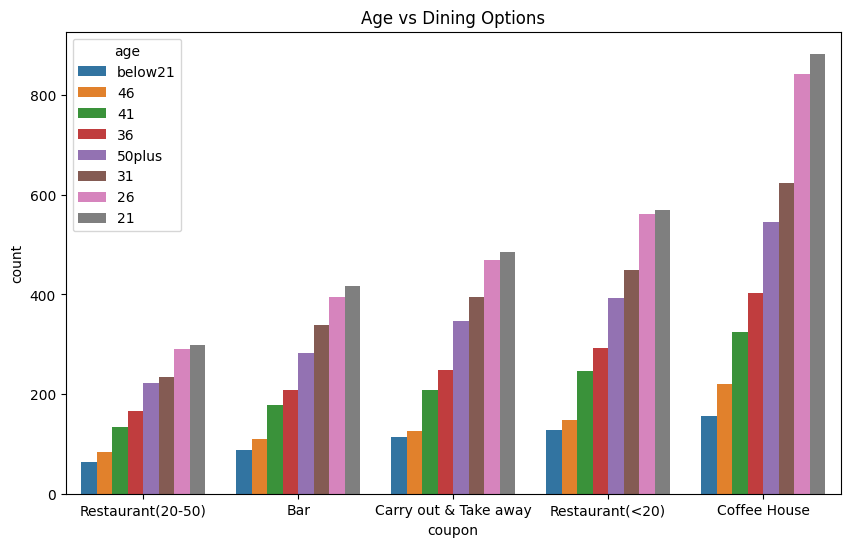

In [30]:
age_segment = data.groupby('coupon')['age'].value_counts()
asv = age_segment.sort_values(ascending=True).reset_index()
print(asv)

plt.figure(figsize=(10,6))
sns.barplot(data=asv, x="coupon", y="count",  hue="age")
plt.title("Age vs Dining Options")

                  coupon  gender  count
0      Restaurant(20-50)    Male    738
1      Restaurant(20-50)  Female    754
2                    Bar    Male    972
3                    Bar  Female   1045
4  Carry out & Take away    Male   1153
5  Carry out & Take away  Female   1240
6        Restaurant(<20)    Male   1365
7        Restaurant(<20)  Female   1421
8           Coffee House    Male   1945
9           Coffee House  Female   2051


Text(0.5, 1.0, 'Gender vs Dining Options')

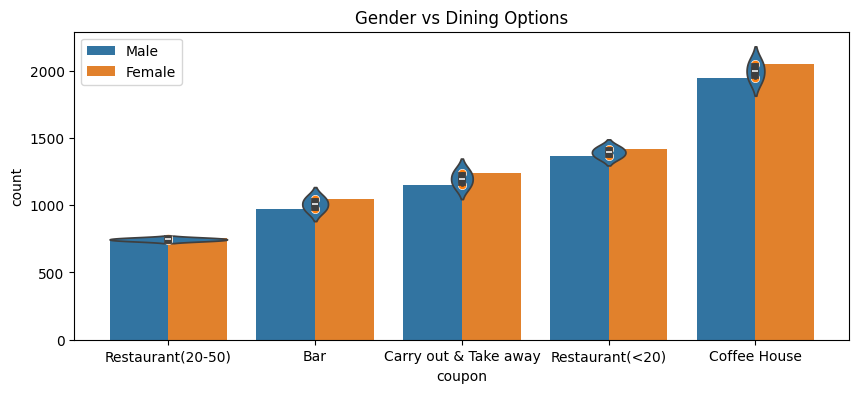

In [31]:
gender_check = data.groupby('coupon')['gender'].value_counts()
gender_chart = gender_check.sort_values(ascending=True).reset_index()
print(gender_chart)
plt.figure(figsize=(10,4))
sns.barplot(data=gender_chart, x="coupon", y="count", hue="gender" )
sns.violinplot(data=gender_chart, x="coupon", y="count")
sns.scatterplot(data=gender_chart, x="coupon", y="count")
plt.title('Gender vs Dining Options')

<Figure size 1000x400 with 0 Axes>

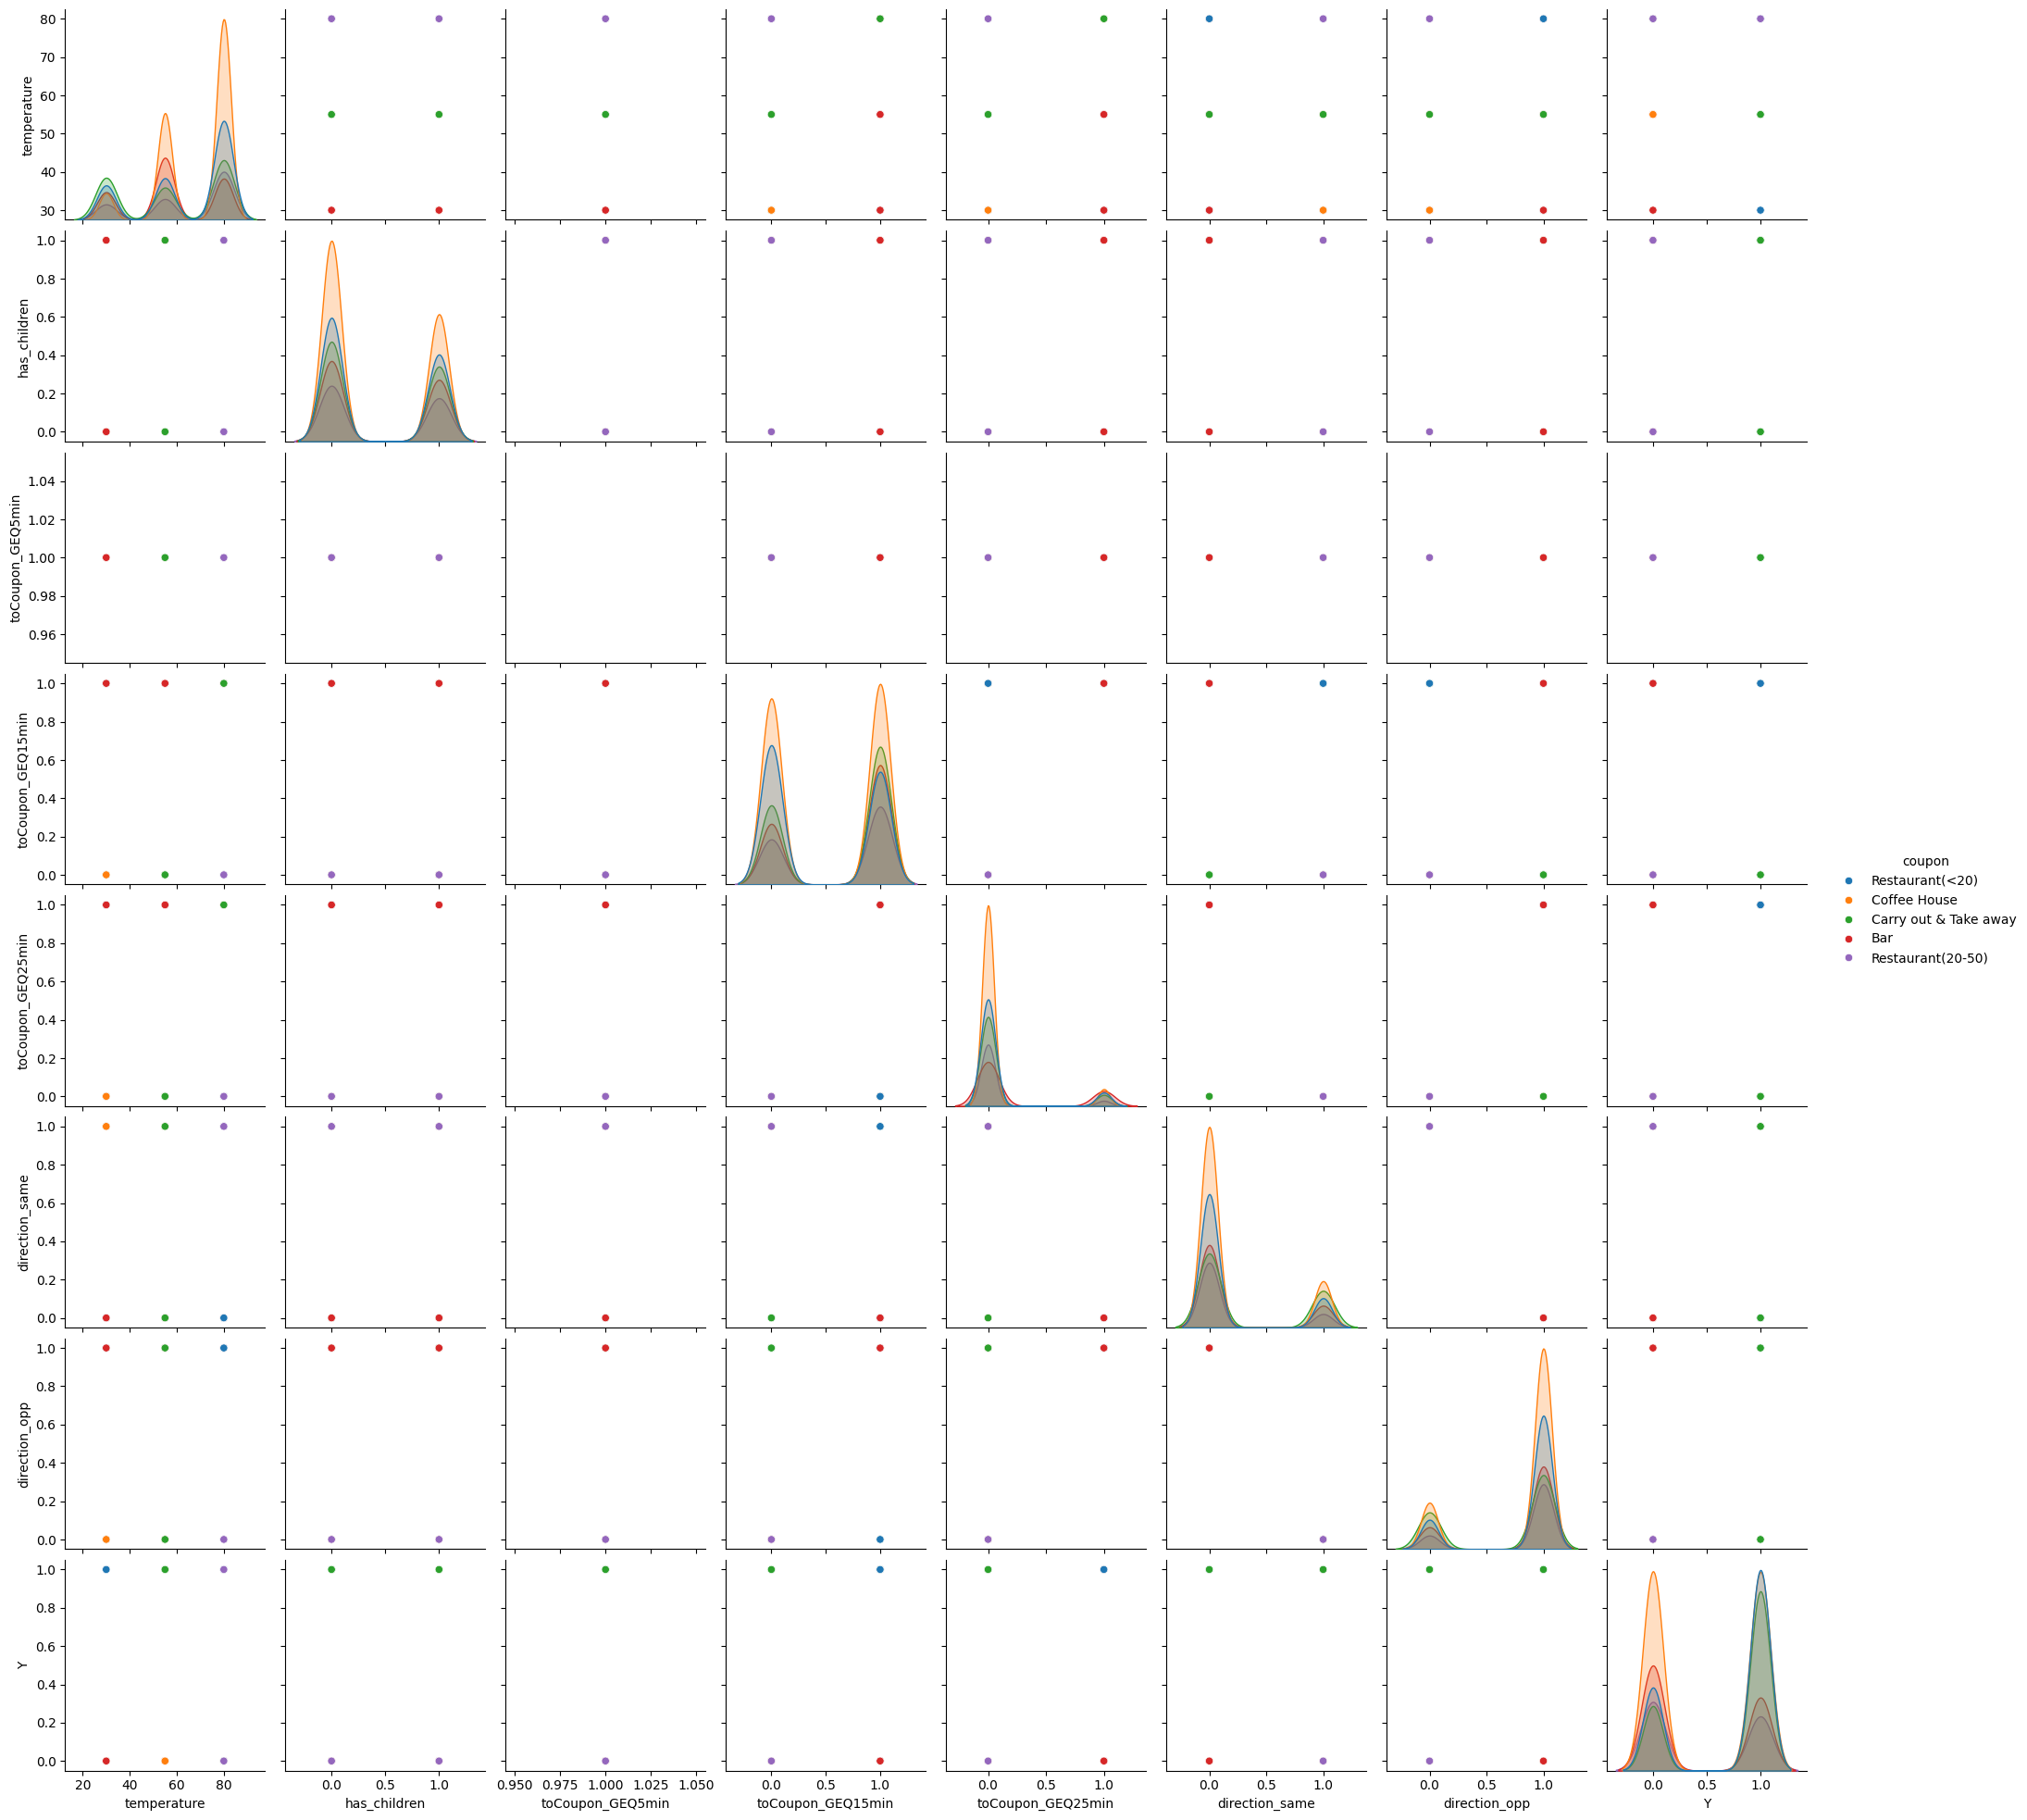

In [32]:
plt.figure(figsize=(10,4))
sns.pairplot(data=data, hue="coupon")

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='count'>

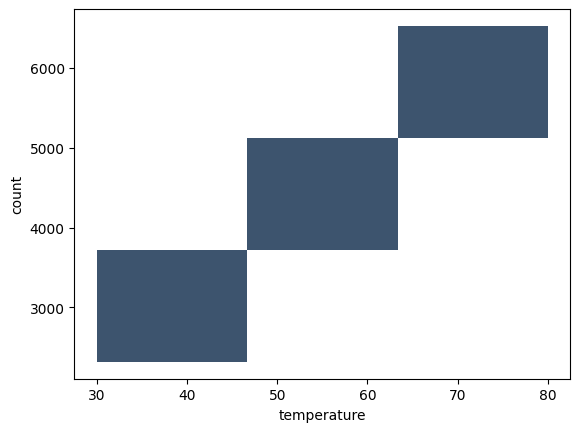

In [33]:
temp_chart = data['temperature'].value_counts().reset_index()
sns.histplot(data=temp_chart, x="temperature", y="count")



   temperature weather  count
0           30   Snowy   1405
1           30   Sunny    911
2           55   Sunny   2630
3           55   Rainy   1210
4           80   Sunny   6528


Text(0.5, 1.0, 'Temperature vs. Weather')

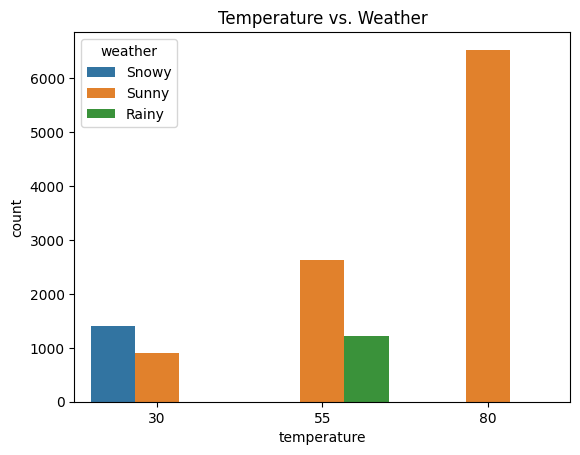

In [34]:
weathervstemp = data.groupby('weather')['temperature'].value_counts().reset_index()
tempvsweather = data.groupby('temperature')['weather'].value_counts().reset_index()
print(tempvsweather)
sns.barplot(data=tempvsweather, x="temperature", y="count", hue="weather")
plt.title("Temperature vs. Weather")

Text(0.5, 0, 'Destination')

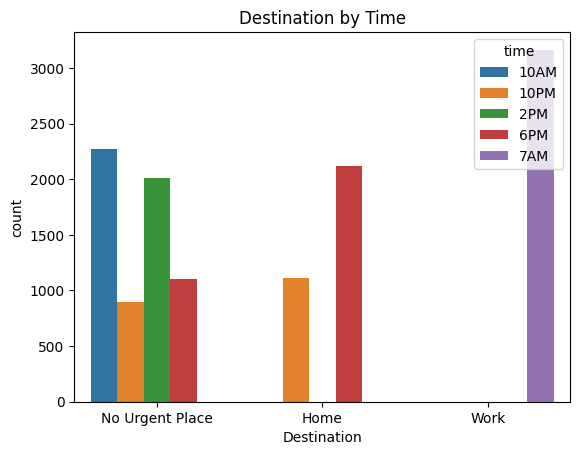

In [35]:
time_check = data.groupby('time')['destination'].value_counts().reset_index()
sns.barplot(time_check, x="destination", y="count", hue="time" )
plt.title("Destination by Time")
plt.xlabel("Destination")



                   coupon      destination  Y  count
0                     Bar             Home  0    275
1                     Bar             Home  1    231
2                     Bar  No Urgent Place  0    606
3                     Bar  No Urgent Place  1    418
4                     Bar             Work  0    309
5                     Bar             Work  1    178
6   Carry out & Take away             Home  0    138
7   Carry out & Take away             Home  1    515
8   Carry out & Take away  No Urgent Place  0    232
9   Carry out & Take away  No Urgent Place  1    746
10  Carry out & Take away             Work  0    263
11  Carry out & Take away             Work  1    499
12           Coffee House             Home  0    592
13           Coffee House             Home  1    336
14           Coffee House  No Urgent Place  0    903
15           Coffee House  No Urgent Place  1   1252
16           Coffee House             Work  0    506
17           Coffee House             Work  1 

Text(0.5, 1.0, 'Coupon by Destination')

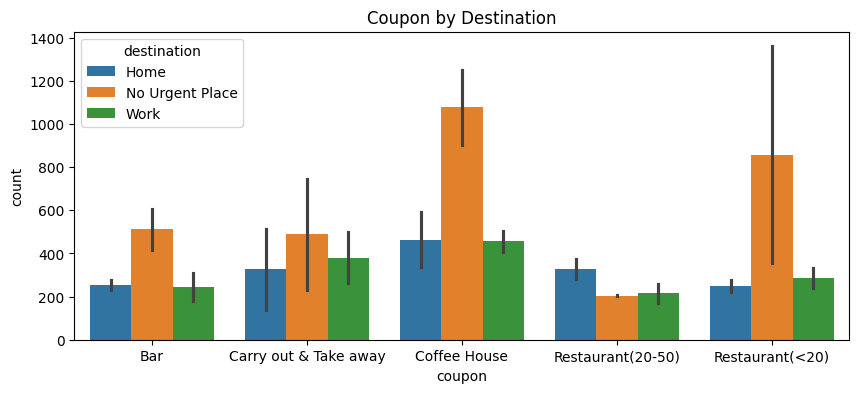

In [36]:
time_check_coupon = data.groupby(['coupon', 'destination', 'Y']).size().reset_index(name='count')
print(time_check_coupon)
plt.figure(figsize=(10,4))
sns.barplot(data=time_check_coupon, x='coupon', y="count", hue="destination" )
plt.title("Coupon by Destination")

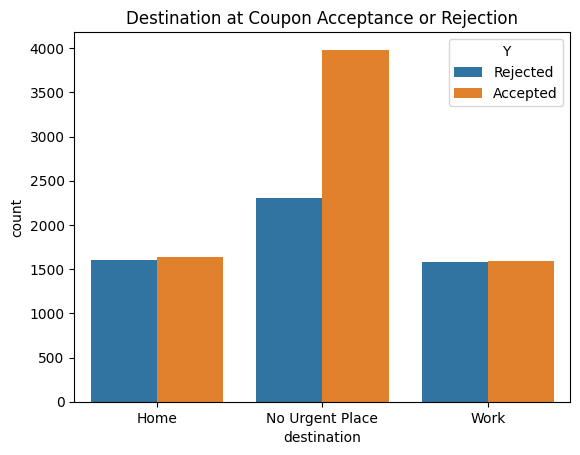

In [37]:
destination = data.groupby('destination')['Y'].value_counts().reset_index()
car_d = sns.barplot(data=destination, x="destination", y="count", hue="Y")
plt.title("Destination at Coupon Acceptance or Rejection")
sns.move_legend(car_d, 'best', labels=["Rejected", "Accepted"])

Text(0.5, 1.0, 'Destination at specific Times')

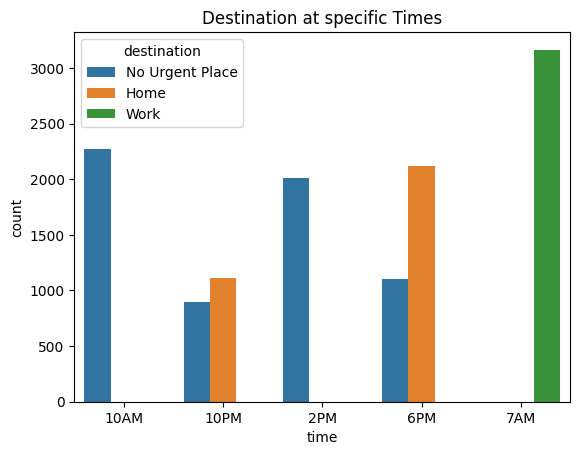

In [38]:
sns.barplot(time_check, x="time", y="count", hue="destination", order=time_check['time'])
plt.title("Destination at specific Times")

Text(0.5, 1.0, 'Time a coupon is accepted or rejected per meal type')

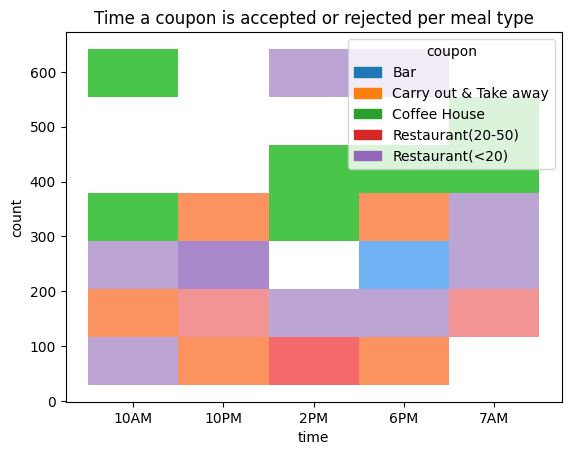

In [39]:
tarc = data.groupby(['time', 'coupon'])['Y'].value_counts().reset_index()
tarc_chart = sns.histplot(data=tarc, x="time", y="count", hue="coupon")
plt.title("Time a coupon is accepted or rejected per meal type")

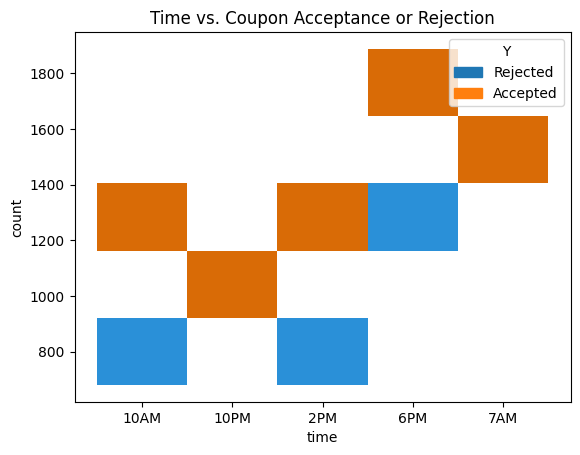

In [40]:

tar = data.groupby('time')['Y'].value_counts()
tar = tar.to_frame()
tar_chart = sns.histplot(data=tar, x="time", y="count", hue="Y")
plt.title("Time vs. Coupon Acceptance or Rejection")
sns.move_legend(tar_chart, 'best', labels=["Rejected", "Accepted"])




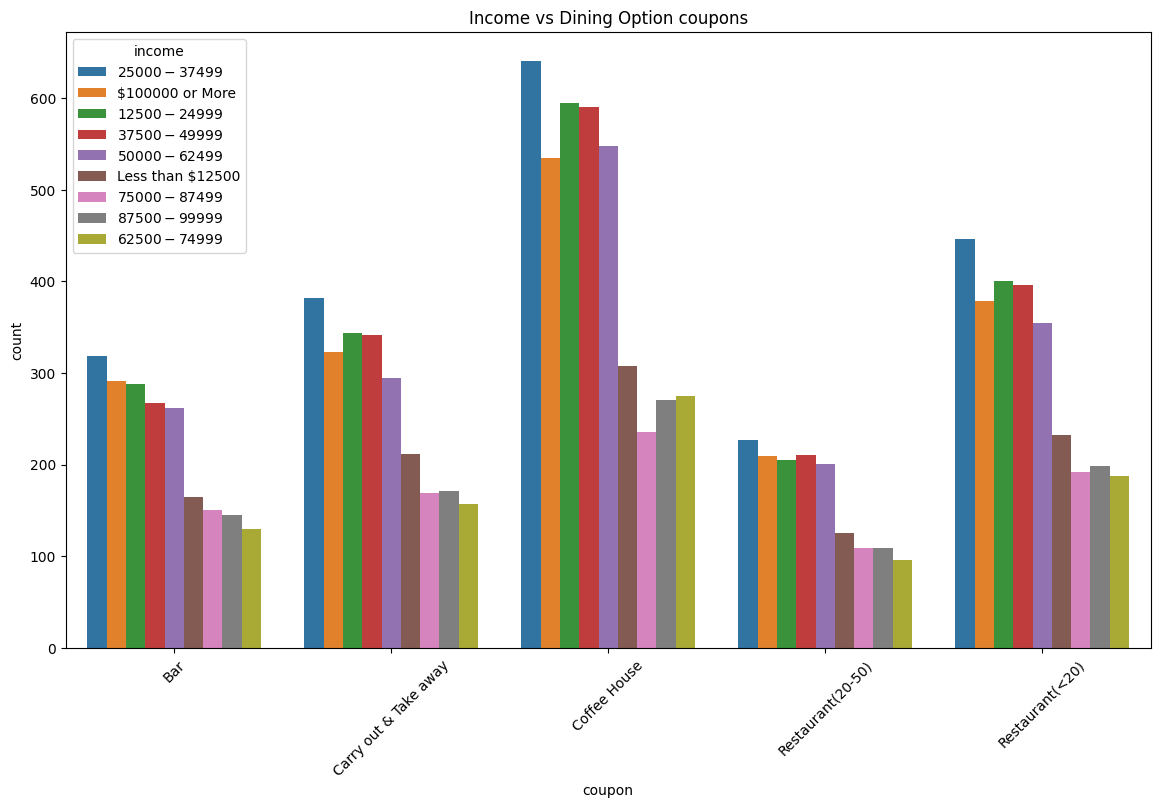

In [41]:
incomecoupon = data.groupby('coupon')['income'].value_counts().reset_index()
plt.figure(figsize=(14,8))
sns.barplot(data=incomecoupon, x='coupon', y="count", hue='income')
plt.xticks(rotation=45)
plt.title('Income vs Dining Option coupons')
plt.show()

<Axes: xlabel='gender', ylabel='income'>

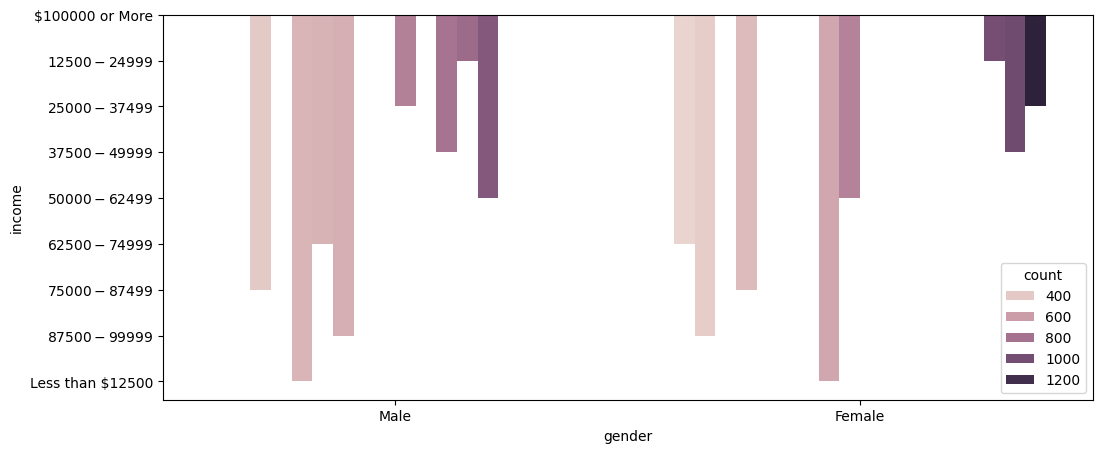

In [42]:
gendervsincome = data.groupby('income')['gender'].value_counts().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=gendervsincome, x="gender", y="income", hue='count')

Text(0.5, 0, 'Gender vs Income')

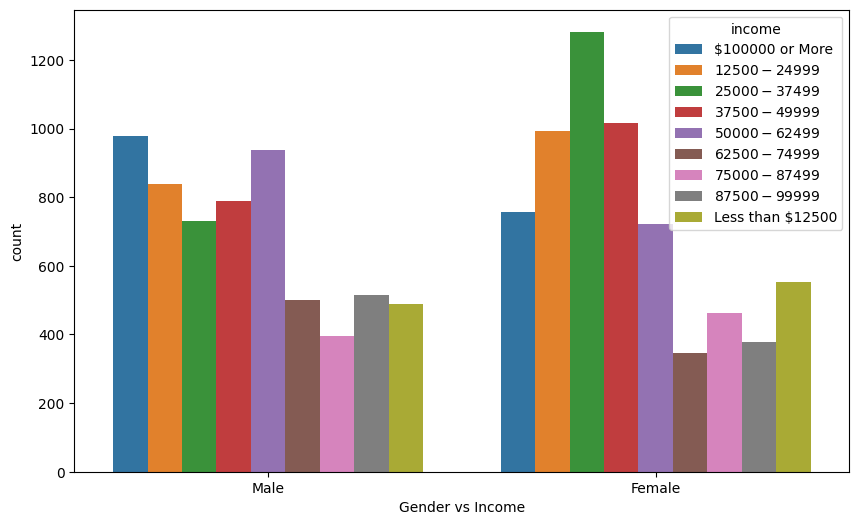

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data=gendervsincome, x="gender", y="count", hue='income')
plt.xlabel('Gender vs Income')

              income  gender  count
0    $100000 or More    Male    979
1    $100000 or More  Female    757
2    $12500 - $24999  Female    993
3    $12500 - $24999    Male    838
4    $25000 - $37499  Female   1282
5    $25000 - $37499    Male    731
6    $37500 - $49999  Female   1015
7    $37500 - $49999    Male    790
9    $50000 - $62499  Female    722
8    $50000 - $62499    Male    937
10   $62500 - $74999    Male    499
11   $62500 - $74999  Female    347
12   $75000 - $87499  Female    462
13   $75000 - $87499    Male    395
14   $87500 - $99999    Male    516
15   $87500 - $99999  Female    379
16  Less than $12500  Female    554
17  Less than $12500    Male    488


<Axes: xlabel='gender', ylabel='income'>

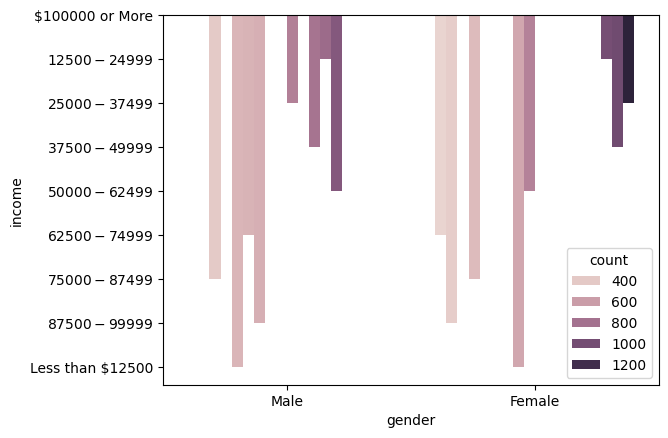

In [44]:
genderagainstincome = data.groupby('income')['gender'].value_counts().reset_index().sort_values(by="income", ascending=True)
print(genderagainstincome)
sns.barplot(data=genderagainstincome, x="gender", y="income", hue="count")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [45]:
bar_df = data[data['coupon']=='Bar']
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [46]:
bar_df_group = bar_df.groupby('coupon')['Y'].value_counts().reset_index()
accepted_value = bar_df_group.loc[1, 'count']
total_count = bar_df_group.loc[1,'count'] + bar_df_group.loc[0,'count']
percent_accepted = ((accepted_value/total_count) * 100)
print("Proportion of bar coupons that were accepted", f"{percent_accepted:.2f}%")

Proportion of bar coupons that were accepted 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64
     Bar  Y  count
8  never  0    687
9  never  1    164
6  less1  0    317
7  less1  1    253
4    gt8  1     36
5    gt8  0     13
2    4~8  1    117
3    4~8  0     33
0    1~3  1    257
1    1~3  0    140


Text(0.5, 1.0, 'Acceptance rate vs Frequency of visits')

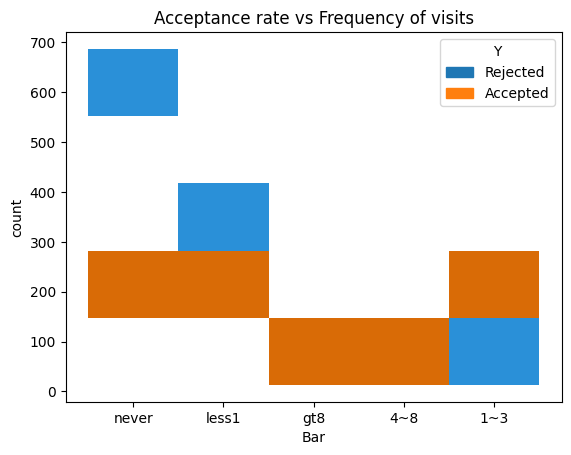

In [47]:
bar_vc = bar_df['Bar'].value_counts()
print(bar_vc)
bar_freq = bar_df.groupby('Bar')['Y'].value_counts().reset_index().sort_values(by="Bar", ascending=False)
print(bar_freq)
b_freq_chart = sns.histplot(data=bar_freq, x="Bar", y="count", hue="Y")
sns.move_legend(b_freq_chart, 'best', labels=["Rejected", "Accepted"])
plt.title('Acceptance rate vs Frequency of visits')

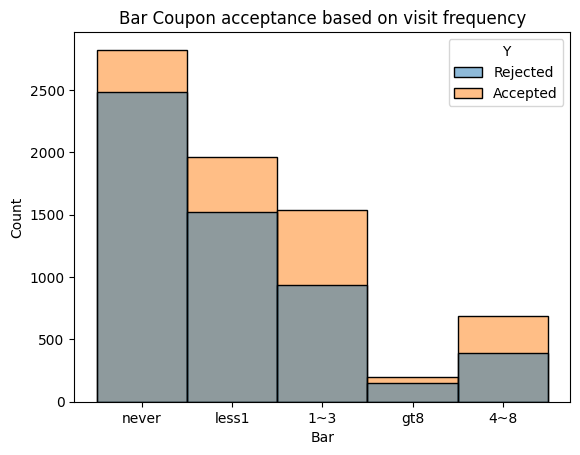

In [74]:
bar_3_or_less = ['never', 'less1', '1~3']
data_bar1 = data.query('Bar in @bar_3_or_less')
data_bar2 = data.query(('Bar not in @bar_3_or_less'))
plt.title("Bar Coupon acceptance based on visit frequency")
sns.color_palette("bright")
db1_chart = sns.histplot(data=data_bar1, x="Bar", hue="Y")
db2_chart = sns.histplot(data=data_bar2, x="Bar", hue="Y")
sns.move_legend(db1_chart, 'best', labels=["Rejected", "Accepted"])
sns.move_legend(db2_chart, 'best', labels=['Rejected', 'Accepted'])

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


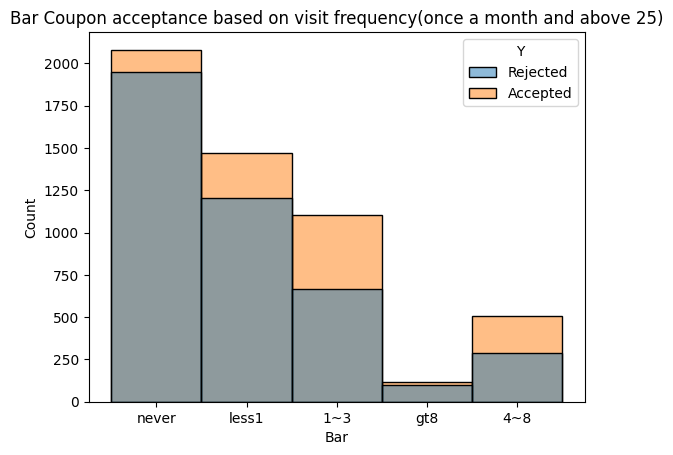

In [81]:
data['Bar'].value_counts()
bar_more_than_once = ['1~3', '4~8', 'gt8']
data['age'].value_counts()
above_twenty_five = ['26','31', '36', '41', '46','50plus']
bar_freq_25 = data.query('Bar in @bar_more_than_once' and 'age in @above_twenty_five')
bar_not_freq_25 = data.query('Bar not in @bar_more_than_once' and 'age not in@above_twenty_five')
plt.title("Bar Coupon acceptance based on visit frequency(once a month and above 25)")
sns.color_palette("bright")
bf25_chart = sns.histplot(data=bar_freq_25, x="Bar", hue="Y")
sns.move_legend(bf25_chart, 'best', labels=["Rejected", "Accepted"])


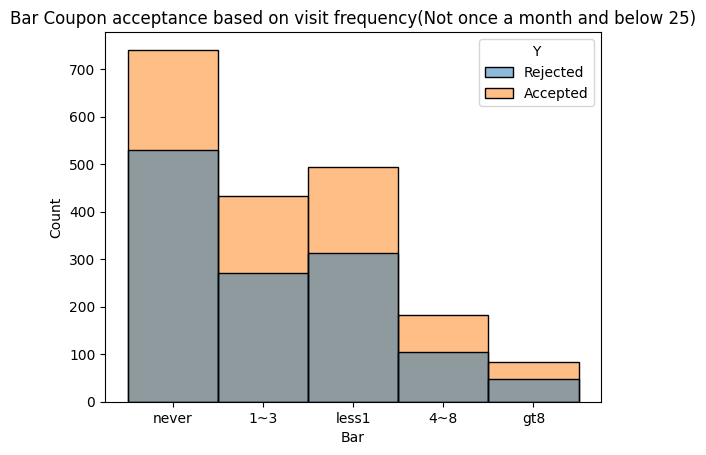

In [82]:
plt.title("Bar Coupon acceptance based on visit frequency(Not once a month and below 25)")
bfnot25_chart = sns.histplot(data=bar_not_freq_25, x="Bar", hue="Y")
sns.move_legend(bfnot25_chart, 'best', labels=['Rejected', 'Accepted'])



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


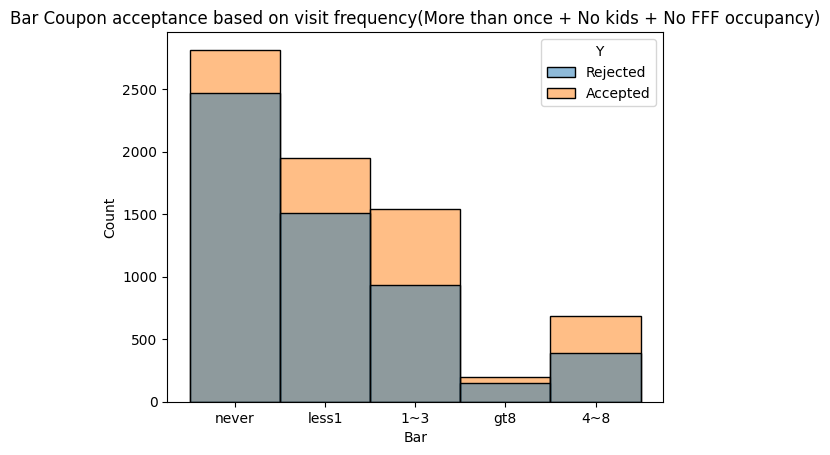

In [91]:
data['Bar'].value_counts()
bar_more_than_once = ['1~3', '4~8', 'gt8']
data['passanger'].value_counts()
kids_in_car = ['Kid(s)']
data['occupation'].value_counts()
fff_occupancy = ['Farming Fishing & Forestry']
acc_no_kids_no_fff = data.query('Bar in @bar_more_than_once'and 'passanger not in @kids_in-car' and 'occupation not in @fff_occupancy')
plt.title("Bar Coupon acceptance based on visit frequency(More than once + No kids + No FFF occupancy)")
acc_no_kids_no_fff_chart = sns.histplot(data=acc_no_kids_no_fff, x="Bar", hue='Y')
sns.move_legend(acc_no_kids_no_fff_chart, 'best', labels=['Rejected', 'Accepted'])


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



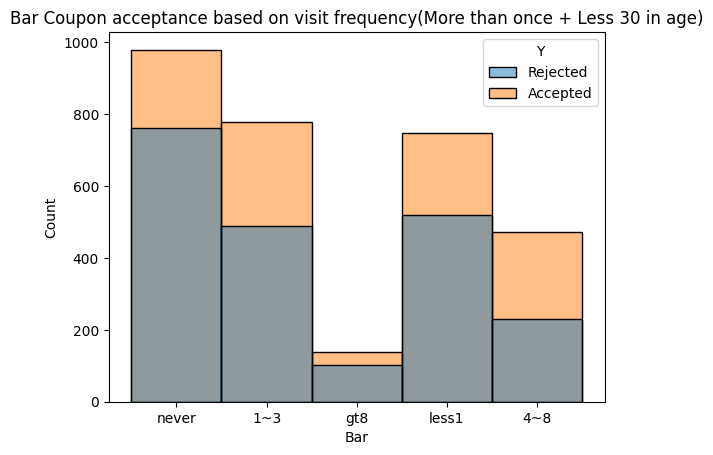

In [95]:
#go to bars more than once a month and are under the age of 30
data['Bar'].value_counts()
bar_visit_month = ['1~3', '4~8','gt8']
data['age'].value_counts()
age_less_than_30 = ['21', '26']
bar_visit_and_less_than_30 = data.query('Bar in @bar_visit_month' and 'age in @age_less_than_30')
plt.title("Bar Coupon acceptance based on visit frequency(More than once + Less 30 in age)")
bv_less_than_30_chart = sns.histplot(data=bar_visit_and_less_than_30, x="Bar", hue="Y")
sns.move_legend(bv_less_than_30_chart, 'best', labels=['Rejected', 'Accepted'])

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [49]:
coffeehouse_df = data[data['coupon']=='Coffee House']
coffeehouse_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [50]:
coffeehouse_df_group = coffeehouse_df.groupby('coupon')['Y'].value_counts().reset_index()
cf_accepted_value = coffeehouse_df_group.loc[1, 'count']
cf_total_count = coffeehouse_df_group.loc[1,'count'] + coffeehouse_df_group.loc[0,'count']
cf_percent_accepted = ((cf_accepted_value/cf_total_count) * 100)
print("Proportion of bar coupons that were accepted", f"{cf_percent_accepted:.2f}%")

Proportion of bar coupons that were accepted 49.92%


In [51]:
#Higher percentage of coffee coupons were accepted (~49%) as compared to bar coupons(~41%)

   gender  Y  count
0  Female  0   1041
1  Female  1   1010
2    Male  1    985
3    Male  0    960


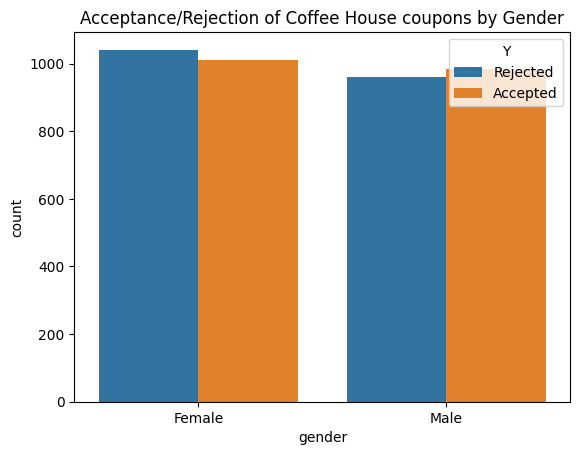

In [52]:
gender_coffee = coffeehouse_df.groupby('gender')['Y'].value_counts().reset_index()
print(gender_coffee)
gender_coffee_chart = sns.barplot(data=gender_coffee, x="gender", y="count", hue="Y")
sns.move_legend(gender_coffee_chart, 'best', labels=["Rejected", "Accepted"])
plt.title('Acceptance/Rejection of Coffee House coupons by Gender')
plt.show()

In [53]:
#50.7% of women tended to reject coffee house coupons so 49.3% accepted a coffee coupon
#Among men, 50.6% of men would accept a coupon to coffeehouse, vs 49.3% would reject a coupon to a coffeehouse

  CoffeeHouse  count
4         gt8   1111
3         4~8   1784
2       never   2962
1         1~3   3225
0       less1   3602


Text(0.5, 0, 'Number of Visits')

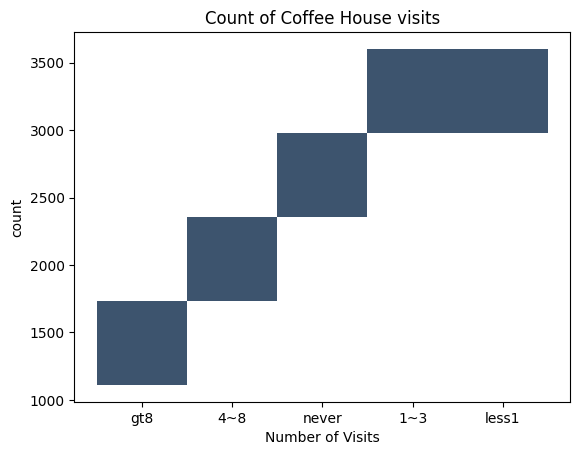

In [54]:
cf_vc = data['CoffeeHouse'].value_counts().reset_index().sort_values(by="count", ascending=True)
print(cf_vc)
sns.histplot(data=cf_vc, x="CoffeeHouse", y="count")
plt.title("Count of Coffee House visits")
plt.xlabel("Number of Visits")


In [55]:
#This indicates that 28% of all observations, visit less than 1 visit
# About 8.7% make more than 8 visits

  CoffeeHouse  Y  count
8       never  0    752
9       never  1    175
6       less1  0    596
7       less1  1    551
4         gt8  1    225
5         gt8  0    117
2         4~8  1    369
3         4~8  0    169
0         1~3  1    675
1         1~3  0    367


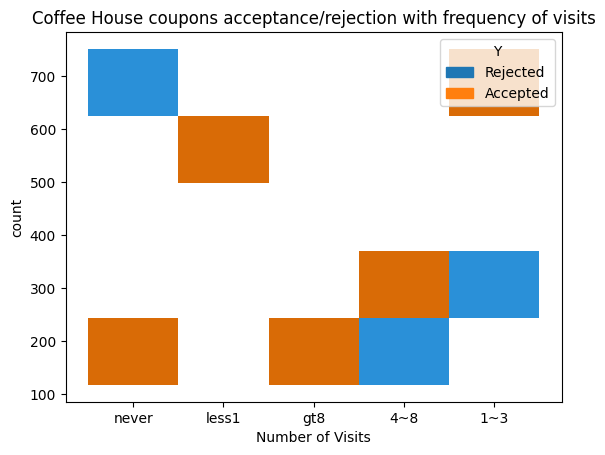

In [56]:
# Compare the acceptance rate between those who went to a coffeehouse 3 or fewer times a month to those who went more.
cf_freq = coffeehouse_df.groupby('CoffeeHouse')['Y'].value_counts().reset_index().sort_values(by="CoffeeHouse", ascending=False)
print(cf_freq)
cf_visit = sns.histplot(data=cf_freq, x="CoffeeHouse", y="count", hue="Y")
sns.move_legend(cf_visit, 'best', labels=["Rejected", "Accepted"])
plt.title("Coffee House coupons acceptance/rejection with frequency of visits")
plt.xlabel("Number of Visits")
plt.show()